## Airline Passenger Forecasting

In [2]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

In [3]:
## Verinin Görselleştirilmesi

df = pd.read_csv("airline-passengers.csv", index_col="month", parse_dates=True)
df.head()

,total_passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.shape

(144, 1)

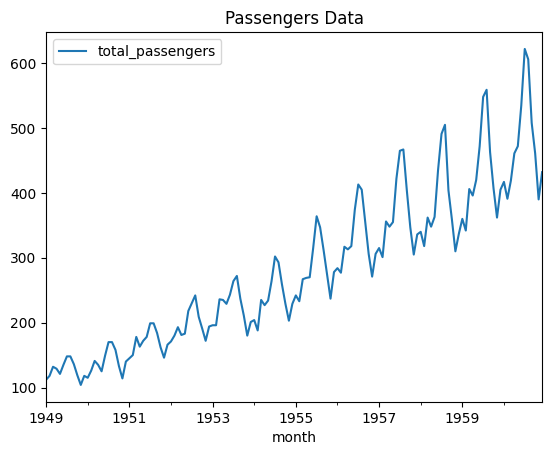

In [5]:
df[["total_passengers"]].plot(title="Passengers Data");

* Durağan değil, trend var, mevsimsellik var.

In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='month', length=144, freq=None)

In [8]:
# Aylık olduğu bilgisini vermeliyiz.
df.index.freq = "MS"

In [9]:
train = df[:120]
test = df[120:]

## Single Exponential Smoothing

In [11]:
alphas = np.arange(0.01, 1, 0.10)

def ses_optimizer(train, test, alphas, step=48):
    best_alpha, best_mae = None, float("inf")
    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_mae = alpha, mae
        print("alpha:", round(alpha,2), "mae:", round(mae,4))
    print("best_alpha:", round(best_alpha,2), "best_mae:", round(best_mae,4))
    return best_alpha, best_mae

best_alpha, best_mae = ses_optimizer(train, test, alphas, step=24)

alpha: 0.01 mae: 225.5863
alpha: 0.11 mae: 82.528
alpha: 0.21 mae: 82.8979
alpha: 0.31 mae: 89.8377
alpha: 0.41 mae: 99.0585
alpha: 0.51 mae: 107.5558
alpha: 0.61 mae: 113.7514
alpha: 0.71 mae: 117.2224
alpha: 0.81 mae: 118.1776
alpha: 0.91 mae: 117.2438
best_alpha: 0.11 best_mae: 82.528


In [12]:
# best_alpha: 0.11 best_mae: 82.528

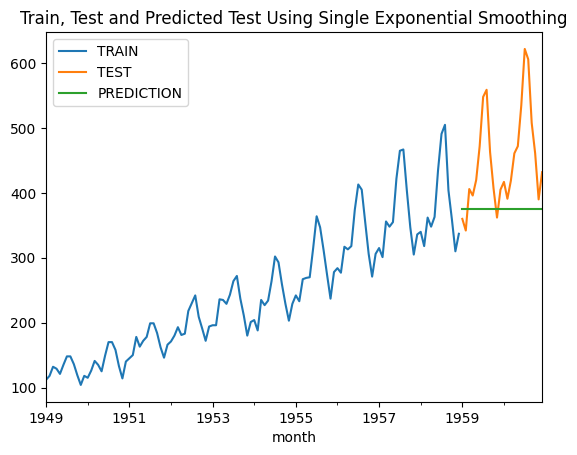

In [13]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)
y_pred = ses_model.forecast(24)

def plot_prediction(y_pred, label):
    train["total_passengers"].plot(legend=True, label="TRAIN")
    test["total_passengers"].plot(legend=True, label="TEST")
    y_pred.plot(legend=True, label="PREDICTION")
    plt.title("Train, Test and Predicted Test Using " + label)
    plt.show()

plot_prediction(y_pred, "Single Exponential Smoothing")

## Double Exponential Smoothing

In [15]:
def des_optimizer(train, test, alphas, betas, step=48):
    best_alpha, best_betas, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha,smoothing_trend=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_betas, best_mae = alpha, beta, mae
            print("alpha:", round(alpha,2), "beta:", round(beta,2), "mae:", round(mae,4))
    print("best_alpha:", round(best_alpha,2), "best_beta:", round(best_betas,4), "best_mae:", round(best_mae,4))
    return best_alpha, best_betas, best_mae

alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train,test,alphas,betas,24)

alpha: 0.01 beta: 0.01 mae: 54.9512
alpha: 0.01 beta: 0.11 mae: 54.1036
alpha: 0.01 beta: 0.21 mae: 55.5568
alpha: 0.01 beta: 0.31 mae: 57.3247
alpha: 0.01 beta: 0.41 mae: 57.7931
alpha: 0.01 beta: 0.51 mae: 57.9968
alpha: 0.01 beta: 0.61 mae: 57.9636
alpha: 0.01 beta: 0.71 mae: 57.5635
alpha: 0.01 beta: 0.81 mae: 57.3334
alpha: 0.01 beta: 0.91 mae: 57.8984
alpha: 0.11 beta: 0.01 mae: 55.0309
alpha: 0.11 beta: 0.11 mae: 58.4728
alpha: 0.11 beta: 0.21 mae: 69.6339
alpha: 0.11 beta: 0.31 mae: 72.555
alpha: 0.11 beta: 0.41 mae: 78.8168
alpha: 0.11 beta: 0.51 mae: 81.996
alpha: 0.11 beta: 0.61 mae: 77.2262
alpha: 0.11 beta: 0.71 mae: 71.5042
alpha: 0.11 beta: 0.81 mae: 69.0258
alpha: 0.11 beta: 0.91 mae: 67.8408
alpha: 0.21 beta: 0.01 mae: 57.1824
alpha: 0.21 beta: 0.11 mae: 74.992
alpha: 0.21 beta: 0.21 mae: 95.9492
alpha: 0.21 beta: 0.31 mae: 115.3164
alpha: 0.21 beta: 0.41 mae: 139.4303
alpha: 0.21 beta: 0.51 mae: 178.3759
alpha: 0.21 beta: 0.61 mae: 243.4543
alpha: 0.21 beta: 0.71 mae:

In [16]:
# best_alpha: 0.01 best_beta: 0.11 best_mae: 54.1036

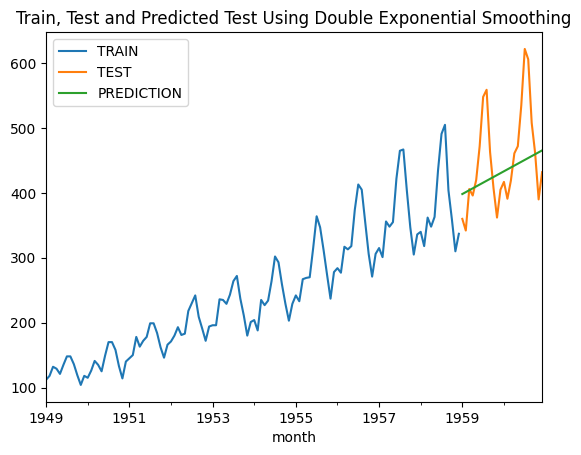

In [17]:
des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=best_alpha,
                                                               smoothing_trend=best_beta)

y_pred = des_model.forecast(24)

plot_prediction(y_pred, "Double Exponential Smoothing")

## Triple Exponential Smoothing (Holt-Winters)

In [19]:
alphas = betas = gammas = np.arange(0.10, 1, 0.20)

abg = list(itertools.product(alphas, betas, gammas))

def tes_optimizer(train, test, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add",seasonal="add").fit(smoothing_level=comb[0],
                                                                                smoothing_slope=comb[1],
                                                                                smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print("alpha:", round(comb[0],2), "beta:", round(comb[1],2), "gamma:", round(comb[2],2), "mae:", round(mae,4))
    print("best_alpha:", round(best_alpha,2), "best_beta:", round(best_beta,4), "best_gamma:", round(best_gamma,4), "best_mae:", round(best_mae,4))
    return best_alpha, best_beta, best_gamma, best_mae

best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, test, abg, 24)

alpha: 0.1 beta: 0.1 gamma: 0.1 mae: 36.8284
alpha: 0.1 beta: 0.1 gamma: 0.3 mae: 34.8767
alpha: 0.1 beta: 0.1 gamma: 0.5 mae: 35.91
alpha: 0.1 beta: 0.1 gamma: 0.7 mae: 38.7169
alpha: 0.1 beta: 0.1 gamma: 0.9 mae: 42.5466
alpha: 0.1 beta: 0.3 gamma: 0.1 mae: 53.9568
alpha: 0.1 beta: 0.3 gamma: 0.3 mae: 52.9994
alpha: 0.1 beta: 0.3 gamma: 0.5 mae: 56.9753
alpha: 0.1 beta: 0.3 gamma: 0.7 mae: 61.3755
alpha: 0.1 beta: 0.3 gamma: 0.9 mae: 67.1721
alpha: 0.1 beta: 0.5 gamma: 0.1 mae: 56.7651
alpha: 0.1 beta: 0.5 gamma: 0.3 mae: 51.7216
alpha: 0.1 beta: 0.5 gamma: 0.5 mae: 53.3893
alpha: 0.1 beta: 0.5 gamma: 0.7 mae: 60.0819
alpha: 0.1 beta: 0.5 gamma: 0.9 mae: 79.2935
alpha: 0.1 beta: 0.7 gamma: 0.1 mae: 34.0388
alpha: 0.1 beta: 0.7 gamma: 0.3 mae: 25.9255
alpha: 0.1 beta: 0.7 gamma: 0.5 mae: 27.8121
alpha: 0.1 beta: 0.7 gamma: 0.7 mae: 27.9081
alpha: 0.1 beta: 0.7 gamma: 0.9 mae: 38.3156
alpha: 0.1 beta: 0.9 gamma: 0.1 mae: 26.8707
alpha: 0.1 beta: 0.9 gamma: 0.3 mae: 25.3172
alpha: 0.1 b

In [20]:
# best_alpha: 0.3 best_beta: 0.3 best_gamma: 0.5 best_mae: 11.9947

Toplamsal v çarpımsal modelleri deneyelim ve mae'lerini karşılaştıralım:

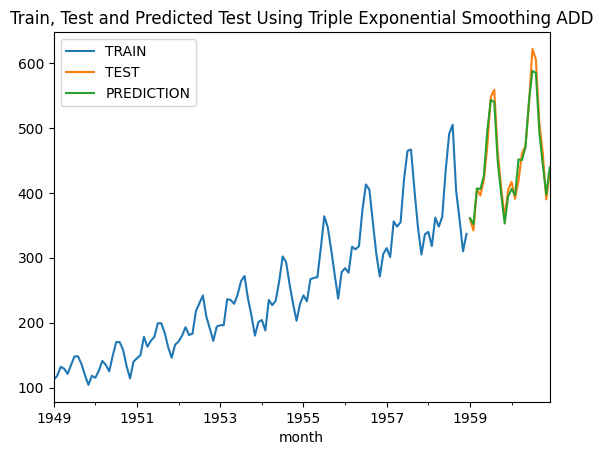

In [22]:
tes_model = ExponentialSmoothing(train,
                                trend="add",
                                seasonal="add",
                                seasonal_periods=12).fit(smoothing_level=best_alpha,
                                                        smoothing_trend=best_beta,
                                                        smoothing_seasonal=best_gamma)

y_pred = tes_model.forecast(24)

plot_prediction(y_pred, "Triple Exponential Smoothing ADD")

## ARIMA(p,d,q): (Autoregressive Integrated Moving Average)

In [24]:
p = d = q = range(0, 4)
pdq = list(itertools.product(p, d, q))

def arima_optimizer_aic(train, orders):
    best_aic, best_params = float("inf"), None
    for order in orders:
        try:
            arima_model = sm.tsa.ARIMA(train, order=order).fit()
            aic = arima_model.aic
            if aic < best_aic:
                best_aic, best_params = aic, order
            print('ARIMA%s AIC=%.2f' % (order, aic))
        except:
            continue
    print('Best ARIMA%s AIC=%.2f' % (best_params, best_aic))
    return best_params

best_params_aic = arima_optimizer_aic(train, pdq)

ARIMA(0, 0, 0) AIC=1436.33
ARIMA(0, 0, 1) AIC=1295.42
ARIMA(0, 0, 2) AIC=1229.22
ARIMA(0, 0, 3) AIC=1169.61
ARIMA(0, 1, 0) AIC=1138.81
ARIMA(0, 1, 1) AIC=1127.02
ARIMA(0, 1, 2) AIC=1126.97
ARIMA(0, 1, 3) AIC=1125.45
ARIMA(0, 2, 0) AIC=1171.65
ARIMA(0, 2, 1) AIC=1136.52
ARIMA(0, 2, 2) AIC=1124.36
ARIMA(0, 2, 3) AIC=1124.57
ARIMA(0, 3, 0) AIC=1263.95
ARIMA(0, 3, 1) AIC=1169.49
ARIMA(0, 3, 2) AIC=1140.39
ARIMA(0, 3, 3) AIC=1127.31
ARIMA(1, 0, 0) AIC=1152.40
ARIMA(1, 0, 1) AIC=1138.85
ARIMA(1, 0, 2) AIC=1140.24
ARIMA(1, 0, 3) AIC=1142.18
ARIMA(1, 1, 0) AIC=1130.66
ARIMA(1, 1, 1) AIC=1125.43
ARIMA(1, 1, 2) AIC=1118.10
ARIMA(1, 1, 3) AIC=1119.79
ARIMA(1, 2, 0) AIC=1168.21
ARIMA(1, 2, 1) AIC=1127.97
ARIMA(1, 2, 2) AIC=1122.89
ARIMA(1, 2, 3) AIC=1123.66
ARIMA(1, 3, 0) AIC=1232.81
ARIMA(1, 3, 1) AIC=1166.48
ARIMA(1, 3, 2) AIC=1170.58
ARIMA(1, 3, 3) AIC=1130.67
ARIMA(2, 0, 0) AIC=1141.99
ARIMA(2, 0, 1) AIC=1138.37
ARIMA(2, 0, 2) AIC=1138.68
ARIMA(2, 0, 3) AIC=1135.89
ARIMA(2, 1, 0) AIC=1126.84
A

In [25]:
arima_model = sm.tsa.arima.ARIMA(train, order=best_params_aic).fit()
y_pred = arima_model.forecast(steps=len(test))
y_pred = pd.Series(y_pred, index=test.index)

mean_absolute_error(test, y_pred)

64.0121464420795

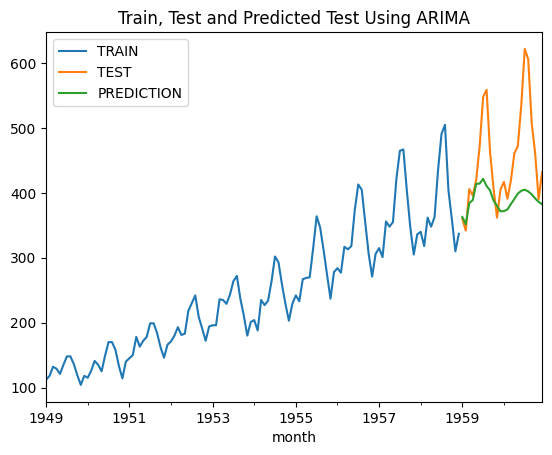

In [26]:
plot_prediction(y_pred, "ARIMA")

## SARIMA

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

def sarima_optimizer_aic(train, pdq, seasonal_pdq):
    best_aic, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                sarimax_model = SARIMAX(train, order=param, seasonal_order=param_seasonal)
                results = sarimax_model.fit(disp=0)
                aic = results.aic
                if aic < best_aic:
                    best_aic, best_order, best_seasonal_order = aic, param, param_seasonal
                print("SARIMA{}x{}12 - AIC:{}".format(param, param_seasonal, aic))
            except:
                continue
    print("SARIMA{}x{}12 - AIC:{}".format(best_order, best_seasonal_order, best_aic))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_aic(train, pdq, seasonal_pdq)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1680.2792351899682
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1557.6320524366079
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1060.4792883426737
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1014.069674752023
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1231.9865853654774
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1185.3010979092192
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:969.3781382611412
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:951.596881879373
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1524.3620853404136
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1403.594235087726
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:967.5225695583989
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:942.2425093046955
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1136.4998829401407
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1127.8397002908205
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:918.2233876022532
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:896.7141004494375
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1138.8088994229254
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10

In [29]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)

sarima_model = model.fit(disp=0)

y_pred = sarima_model.get_forecast(steps=24).predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

mean_absolute_error(test, y_pred)

68.57726545091671

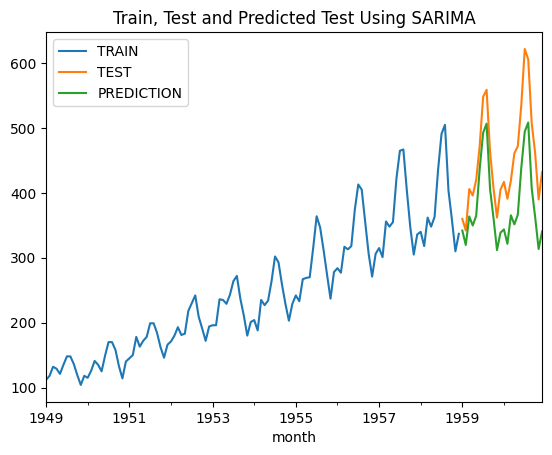

In [30]:
plot_prediction(y_pred, "SARIMA")

In [31]:
# MAE

p = d = q = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

def sarima_optimizer_mae(train, test, pdq, seasonal_pdq, step=48):
    best_mae, best_order, best_seasonal_order = float("inf"), None, None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model=SARIMAX(train, order=param, seasonal_order=param_seasonal)
                sarima_model = model.fit(disp=0)
                y_pred_test = sarima_model.get_forecast(steps=step)
                y_pred = y_pred_test.predicted_mean
                mae = mean_absolute_error(test, y_pred)

                if mae < best_mae:
                    best_mae, best_order, best_seasonal_order = mae, param, param_seasonal
                print("SARIMA{}x{}12 - MAE:{}".format(param, param_seasonal, mae))
            except:
                continue
    print("SARIMA{}x{}12 - MAE:{}".format(best_order, best_seasonal_order, best_mae))
    return best_order, best_seasonal_order

best_order, best_seasonal_order = sarima_optimizer_mae(train, test, pdq, seasonal_pdq, 24)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - MAE:452.25
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - MAE:367.20954586119325
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - MAE:71.25
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - MAE:72.62972636200828
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - MAE:74.93602907341425
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - MAE:76.79705135044031
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - MAE:58.59973873979101
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - MAE:30.61425072244037
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - MAE:442.6732363260251
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - MAE:356.28978574278534
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - MAE:70.49252849401081
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - MAE:71.32051670136198
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - MAE:75.48455725258671
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - MAE:76.43384542097486
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - MAE:61.013885445606626
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - MAE:31.73641436205189
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - MAE:115.25
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - MAE:119.36368443583343
SARIMA(0, 1, 0)x(0, 1,

In [32]:
model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)

sarima_model = model.fit(disp=0)

y_pred = sarima_model.get_forecast(steps=24).predicted_mean
y_pred = pd.Series(y_pred, index=test.index)

mean_absolute_error(test, y_pred)

30.61425072244037

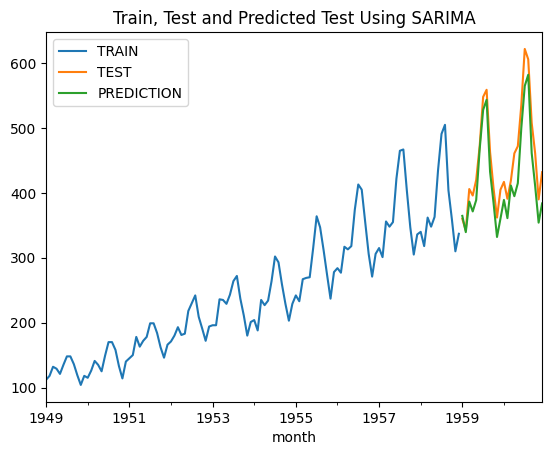

In [33]:
plot_prediction(y_pred, "SARIMA")

Ee küçük mae değerine TES modeli sahip!

In [61]:
# Final Model

tes_model = ExponentialSmoothing(df,
                                trend="add",
                                seasonal="add",
                                seasonal_periods=12).fit(smoothing_level=best_alpha,
                                                        smoothing_trend=best_beta,
                                                        smoothing_seasonal=best_gamma)

tes_model.forecast(6)


1961-01-01    450.286328
1961-02-01    429.302014
1961-03-01    475.721707
1961-04-01    502.017555
1961-05-01    516.825558
1961-06-01    579.037167
Freq: MS, dtype: float64